<a href="https://colab.research.google.com/github/RomanKunal/Machine-Learning/blob/main/DIABETICCASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [16]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [5]:
data.shape

(768, 9)

In [6]:
data.std()

,0
Pregnancies,3.369578
Glucose,31.972618
BloodPressure,19.355807
SkinThickness,15.952218
Insulin,115.244002
BMI,7.884160
DiabetesPedigreeFunction,0.331329
Age,11.760232
Outcome,0.476951


<ipython-input-8-3691e73ca89a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Glucose'])


<Axes: xlabel='Glucose', ylabel='Density'>

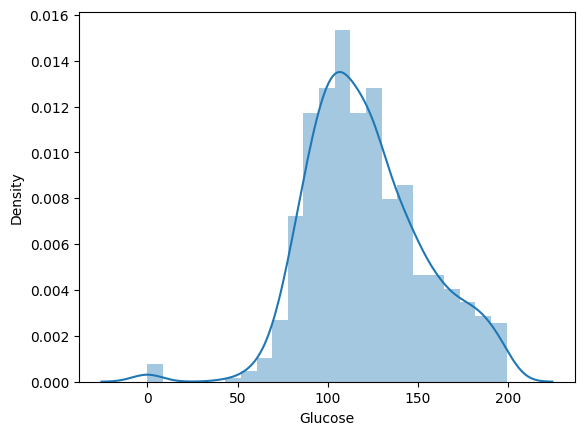

In [8]:
sns.distplot(data['Glucose'])
#

<ipython-input-9-a6948ce9ea95>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Insulin'])


<Axes: xlabel='Insulin', ylabel='Density'>

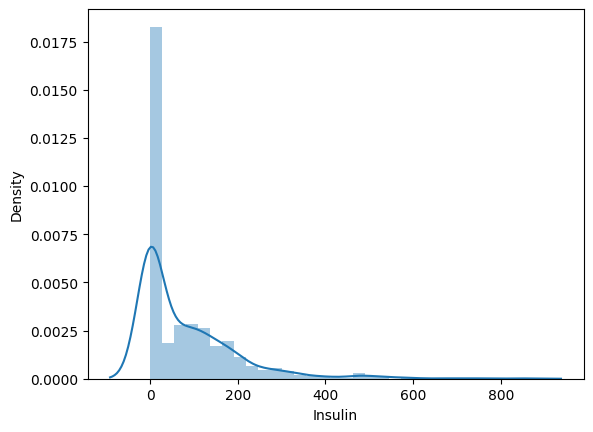

In [9]:
sns.distplot(data['Insulin'])

In [10]:
scaler=StandardScaler()

In [11]:
X=data.drop(columns='Outcome',axis=1)
Y=data['Outcome']

In [12]:
std_data=scaler.fit_transform(X)

In [13]:
std_data.std()

1.0

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(std_data,Y,test_size=0.2,random_state=2)

In [15]:
print(std_data.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


In [17]:
model=svm.SVC(kernel='linear')

In [18]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [19]:
# MODEL EVALUATION
X_train_acc=model.predict(X_train)
train_acc=accuracy_score(X_train_acc,Y_train)
print(train_acc*100)

77.19869706840392


In [20]:
X_test_acc=model.predict(X_test)
test_acc=accuracy_score(X_test_acc,Y_test)
print(test_acc*100)

76.62337662337663


In [28]:
#TEST THE MODEL
input_data=(11,111,84,40,0,46.8,0.925,45)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
std_data1=scaler.transform(input_data_reshaped)
prediction=model.predict(std_data1)
print(prediction)
if(prediction[0]==0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
